In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**import train and test files**

In [2]:
import zipfile
train_zip = zipfile.ZipFile('../input/forest-cover-type-kernels-only/train.csv.zip')
test_zip = zipfile.ZipFile('../input/forest-cover-type-kernels-only/test.csv.zip')

data = pd.read_csv(train_zip.open('train.csv'))
test_data =  pd.read_csv(test_zip.open('test.csv'))

**Data cleaning**

**get info and check for null values** 

**get duplicates and drop it if exists**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [4]:
#check for null values and count it
print(data.isnull().sum())

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [5]:
#get duplicates 
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15115    False
15116    False
15117    False
15118    False
15119    False
Length: 15120, dtype: bool

In [6]:
print(data.shape)
print(test_data.shape)

(15120, 56)
(565892, 55)


In [7]:
data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

**visualize the relation between cover type and numeric features**

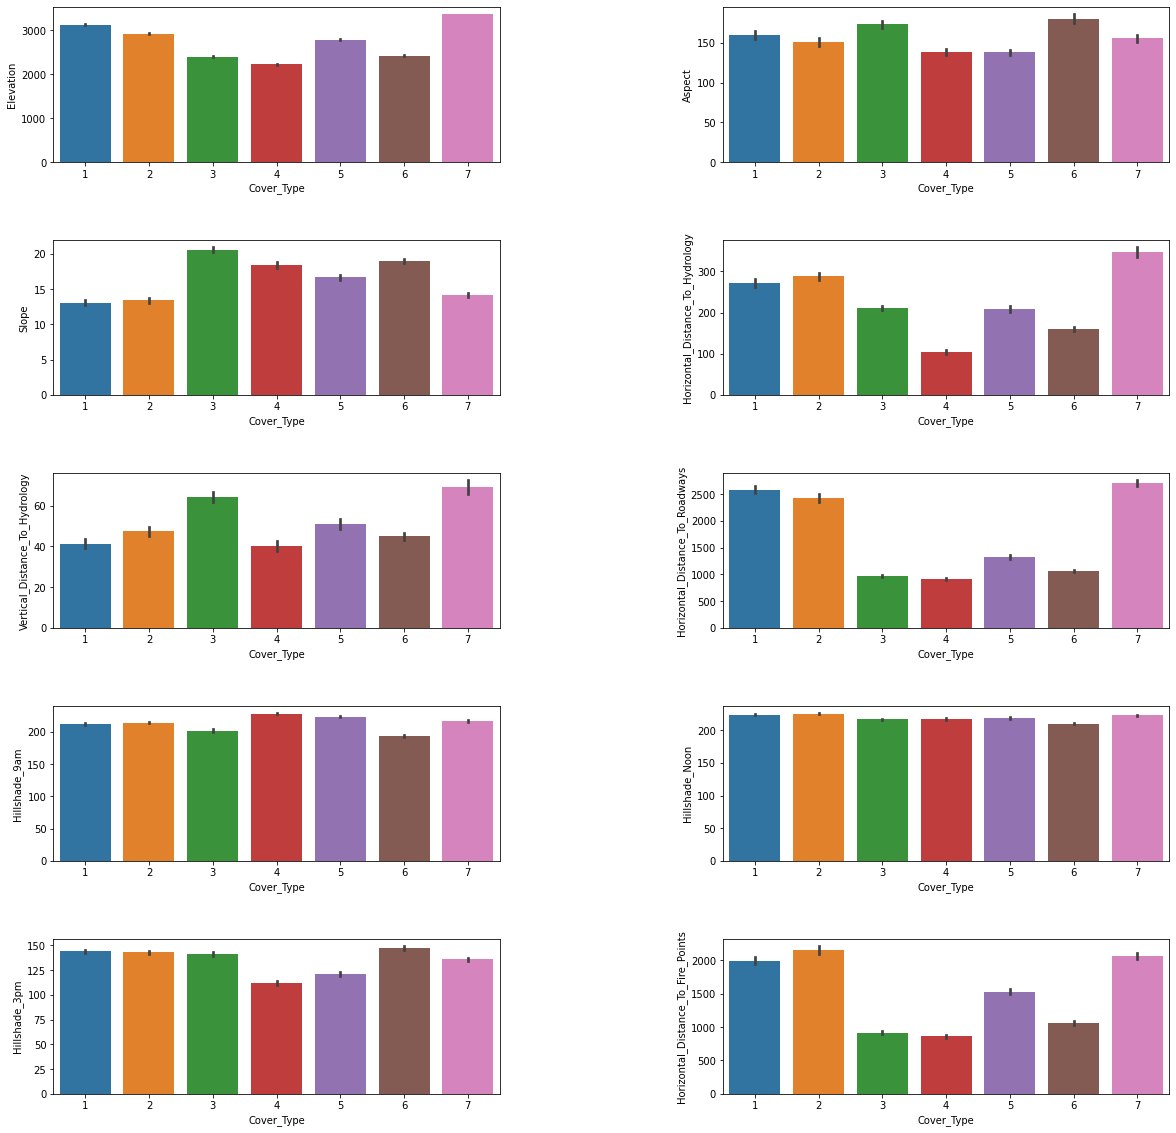

In [8]:
l = ['Elevation','Aspect', 'Slope','Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
        'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
i=1
rows = 5
cols = 2
for col in l:
    ax = fig.add_subplot(rows, cols, i)
    sns.barplot(x="Cover_Type", y=col, data=data)
    plt.ylabel(col)
    i+=1

**visualize the relation between cover type and categorical features**

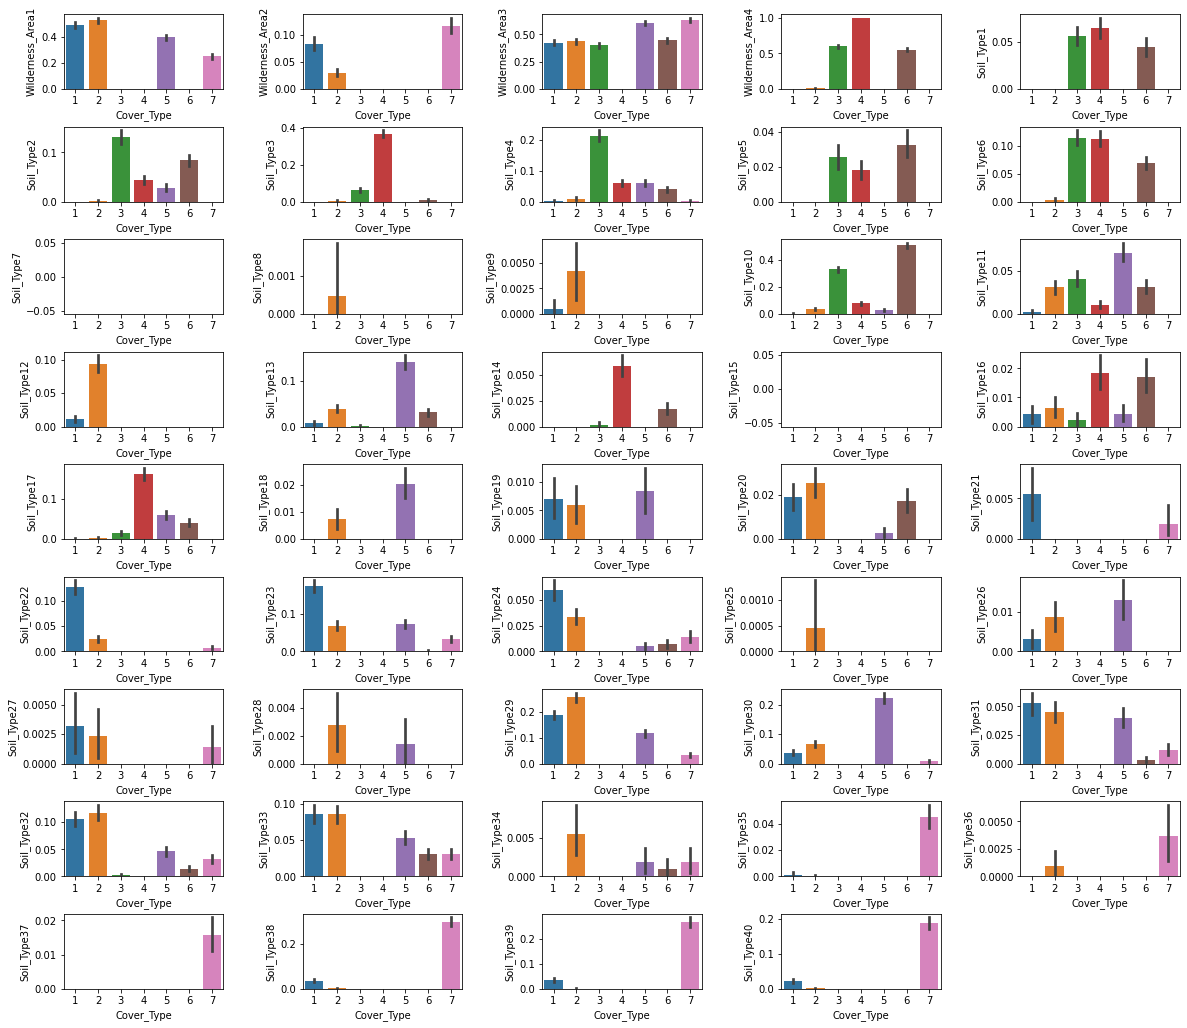

In [9]:
l = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
i=1
rows = 10
cols = 5
for col in l:
    ax = fig.add_subplot(rows, cols, i)
    sns.barplot(x="Cover_Type", y=col, data=data)
    plt.ylabel(col)
    i+=1

**Specify training features and labels**

In [10]:
labels = data['Cover_Type']
features =['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

**Split data into training and validition**

In [11]:
x = data.loc[:,features]
y = labels
x_train, x_val, y_train, y_val = train_test_split( x.values, y.values, test_size=0.1, random_state=5 )

**try to classify this problem by 3 classifiers and get best of them**

**KNN**

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_val)
accuracy_score(y_val, pred)

0.843915343915344

**Random Forest**

In [13]:
RF = RandomForestClassifier(n_estimators=1000, random_state=5)
RF.fit(x_train, y_train)
pred = RF.predict(x_val)
accuracy_score(y_val,pred)

0.873015873015873

**Desicion Tree**

In [14]:
DT = DecisionTreeClassifier(max_depth=10)
DT.fit(x_train, y_train)
pred = DT.predict(x_val)
accuracy_score(y_val,pred)

0.7652116402116402

**get forest cover type for test data**

In [15]:
x_test = test_data.loc[:,features]
y_test = RF.predict(x_test)
y_test

array([2, 1, 2, ..., 3, 3, 3])

**generate submission file**

In [16]:
submission = pd.DataFrame()
submission['Id'] = test_data["Id"]
submission['Cover_Type'] = y_test
submission.to_csv('submission.csv', index=False)


**Conclusion**

**1 - No missing data**

**2 - No duplicates in data**

**3 - the cover type is affected by many variables**

**4 - KNN clasifier is the best with 0.87 val accuracy**